HW2_Hardik-Prajapati_2678294168


Combined Cycle Power Plant Data Set : The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize


Exploring the data:

Q4_b_i:

In [5]:
df=pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx",engine='openpyxl')
print(df)
print("No. of rows and columns are {} and {} respectively.".format(df.shape[0],df.shape[1]))
print("Rows represent samples of data. First 4 Columns represent different features and the last column represen the Y-variable () ")

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
No. of rows and columns are 9568 and 5 respectively.
Rows represent samples of data. First 4 Columns represent different features and the last column represen the Y-variable () 


Q4_b_ii:

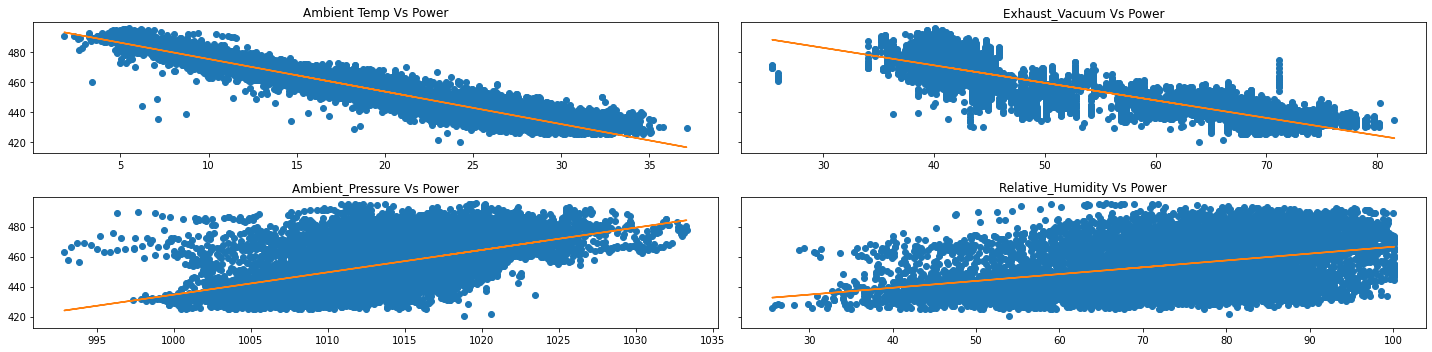

It can be observed that Power is directly proportional to Ambient Pressure and Relative Humidity whereas Power is Inversely proportional to Ambient Temperature and Exhuast Vacuum


In [6]:
x_axis_at=np.array((df["AT"]))
x_axis_v=np.array((df["V"]))
x_axis_ap=np.array((df["AP"]))
x_axis_rh=np.array((df["RH"]))
y_axis_pe=np.array((df["PE"]))

fig,axs=plt.subplots(2,2,sharey=True,figsize=(20,5))
axs[0,0].plot(x_axis_at,y_axis_pe,'o')
axs[0,0].set_title("Ambient Temp Vs Power")
m1,b1=np.polyfit(x_axis_at,y_axis_pe,1)
axs[0,0].plot(x_axis_at,m1*x_axis_at+b1)
axs[0,1].plot(x_axis_v,y_axis_pe,'o')
axs[0,1].set_title("Exhaust_Vacuum Vs Power")
m2,b2=np.polyfit(x_axis_v,y_axis_pe,1)
axs[0,1].plot(x_axis_v,m2*x_axis_v+b2)
axs[1,0].plot(x_axis_ap,y_axis_pe,'o')
axs[1,0].set_title("Ambient_Pressure Vs Power")
m3,b3=np.polyfit(x_axis_ap,y_axis_pe,1)
axs[1,0].plot(x_axis_ap,m3*x_axis_ap+b3)
axs[1,1].plot(x_axis_rh,y_axis_pe,'o')
axs[1,1].set_title("Relative_Humidity Vs Power")
m4,b4=np.polyfit(x_axis_rh,y_axis_pe,1)
axs[1,1].plot(x_axis_rh,m4*x_axis_rh+b4)
fig.tight_layout()
plt.show()
print("It can be observed that Power is directly proportional to Ambient Pressure and Relative Humidity whereas Power is Inversely proportional to Ambient Temperature and Exhuast Vacuum")


Q4_b_iii:

In [7]:
stats=df.describe()
ra=(stats.iloc[7]-stats.iloc[3])
stats.loc[len(stats.index)] = ra
iqr=(stats.iloc[6]-stats.iloc[4])
stats.loc[len(stats.index)] = iqr
stats=stats.rename(index={8:'range',9:'IQR'})
print(stats)


                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000
range    35.300000    56.200000    40.410000    74.600000    75.500000
IQR      12.210000    24.800000     8.160000    21.502500    28.680000


Q4_C:

In [8]:
feature_data=df.iloc[:,:4]
y_data=df.iloc[:,4:]
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(feature_data)
y_scaled=scaler.fit_transform(y_data)

#linearRegression model
parameters={}
def LinearRegression_simple(x_data,y_data,feature_name):
    x_data=sm.add_constant(x_data)

    model_linear=sm.OLS(y_data,x_data).fit()

    parameters[feature_name]=model_linear.params
    r2_val=model_linear.rsquared
    t_val=model_linear.tvalues
    p_val=model_linear.pvalues

    print(model_linear.summary())
    print("The p-value is {}".format(p_val))
    if p_val[1]<0.05:
        print("This feature {} has statistically significant association".format(feature_name))
    else:
        print("This feature {} does not have statistically significant association".format(feature_name))


    outliers=model_linear.outlier_test()
    outliers_index=np.where(outliers[:,1]<0.05)

    fig,axs=plt.subplots(figsize=(10,5))
    with plt.style.context('ggplot'):
        axs.scatter(x_data[:,1], y_data, alpha=0.3, label="{} vs Power".format(feature_name))
        axs.scatter(x_data[outliers_index][:,1], y_data[outliers_index], marker="+", label="Outliers")
        axs.plot(x_data[:,1], model_linear.predict(x_data), "tab:red", alpha=0.8, label="Simple Linear Regression")
    axs.set_title("Simple Linear Regression for {}".format(feature_name))
    axs.set_xlabel(feature_name)
    axs.set_ylabel("PE")
    axs.legend()
    plt.show()

    return model_linear,parameters,r2_val,t_val,p_val

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:42:38   Log-Likelihood:                 11617.
No. Observations:                9568   AIC:                        -2.323e+04
Df Residuals:                    9566   BIC:                        -2.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9648      0.002    506.156      0.0

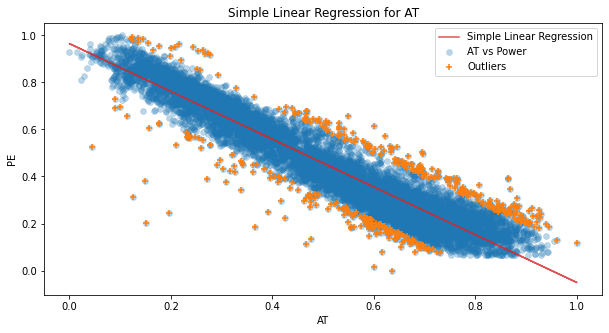

In [9]:
#AT
model_at,parm_at,r2val_at,tval_at,pval_at=LinearRegression_simple(x_scaled[:,0:1],y_scaled,"AT")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:43:09   Log-Likelihood:                 7410.0
No. Observations:                9568   AIC:                        -1.482e+04
Df Residuals:                    9566   BIC:                        -1.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8996      0.003    317.085      0.0

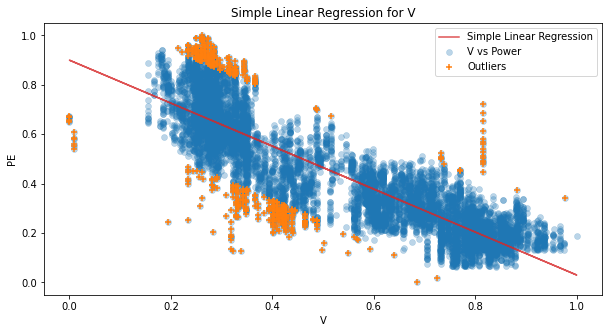

In [10]:
#V
model_v,parm_v,r2val_v,tval_v,pval_v=LinearRegression_simple(x_scaled[:,1:2],y_scaled,"V")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:43:37   Log-Likelihood:                 2149.1
No. Observations:                9568   AIC:                            -4294.
Df Residuals:                    9566   BIC:                            -4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0498      0.007      7.049      0.0

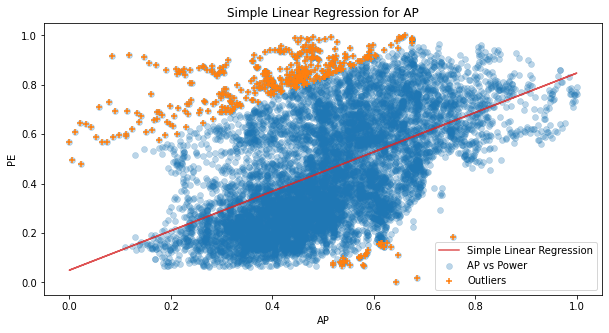

In [11]:
#AP
model_ap,parm_ap,r2val_ap,tval_ap,pval_ap=LinearRegression_simple(x_scaled[:,2:3],y_scaled,"AP")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:44:04   Log-Likelihood:                 1440.0
No. Observations:                9568   AIC:                            -2876.
Df Residuals:                    9566   BIC:                            -2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1636      0.007     22.469      0.0

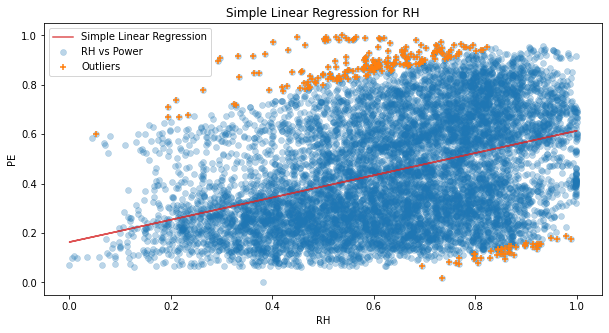

In [12]:
#RH
model_rh,parm_rh,r2val_rh,tval_rh,pval_rh=LinearRegression_simple(x_scaled[:,3:4],y_scaled,"RH")


Q4_D:

In [13]:
#Multiple regression model
trainX_mr = sm.add_constant(x_scaled)
model_multipleRegression = sm.OLS(y_scaled, trainX_mr).fit()
print(model_multipleRegression.summary())
print("Since All the p-values for features are very low, almost equal to, Hence we can reject Null Hypothesis for all features i.e H_0:B_i=0")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:45:51   Log-Likelihood:                 13285.
No. Observations:                9568   AIC:                        -2.656e+04
Df Residuals:                    9563   BIC:                        -2.652e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0919      0.006    187.447      0.0

Q4_E

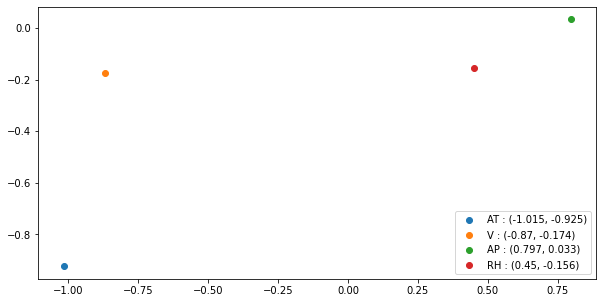

In [14]:
fig, axes = plt.subplots(figsize=(10, 5))
for i, feature in enumerate(df.columns[:-1]):
     text = "{} : ({}, {})".format(feature,
                                         np.around(parameters[feature][1], 3),
                                         np.around(model_multipleRegression.params[i+1], 3))
     axes.scatter(parameters[feature][1], model_multipleRegression.params[i+1], label=text)
axes.legend()
plt.show()


Q4_f:

In [15]:
def NonLinear_predictors(data_x, data_y, feature_name):

    poly_equation = PolynomialFeatures(3)
    x_train_poly = poly_equation.fit_transform(data_x)
    model_nonLinear_feature = sm.OLS(data_y, x_train_poly).fit()
    print(model_nonLinear_feature.summary())

    return model_nonLinear_feature

In [16]:
#AT_NONlinear
nonLinear_at=NonLinear_predictors(x_scaled[:,0:1],y_scaled,"AT")
print("The p-values are low and hence rejects the Null Hypothesis.It indicates there is enough evidence for nonlinear association of predictor and response")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:48:22   Log-Likelihood:                 12272.
No. Observations:                9568   AIC:                        -2.454e+04
Df Residuals:                    9564   BIC:                        -2.451e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9400      0.006    148.540      0.0

In [19]:
#V_NONlinear
nonLinear_v=NonLinear_predictors(x_scaled[:,1:2],y_scaled,"V")
print("The p-values is high for x^2 term and hence cannot reject the Null Hypothesis for x_square.Although It indicates there is enough evidence for nonlinear association of predictor(x_square) and response")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:50:25   Log-Likelihood:                 7788.1
No. Observations:                9568   AIC:                        -1.557e+04
Df Residuals:                    9564   BIC:                        -1.554e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0590      0.017     61.089      0.0

In [20]:
#AP_NONlinear
nonLinear_ap=NonLinear_predictors(x_scaled[:,2:3],y_scaled,"AP")
print("The p-values are low and hence rejects the Null Hypothesis.It indicates there is enough evidence for nonlinear association of predictor and response")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     1350.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:50:54   Log-Likelihood:                 2341.2
No. Observations:                9568   AIC:                            -4674.
Df Residuals:                    9564   BIC:                            -4646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7065      0.034     20.843      0.0

In [21]:
#RH_NONlinear
nonLinear_rh=NonLinear_predictors(x_scaled[:,3:4],y_scaled,"RH")
print("The p-values are low and hence rejects the Null Hypothesis.It indicates there is enough evidence for nonlinear association of predictor and response")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:51:14   Log-Likelihood:                 1450.2
No. Observations:                9568   AIC:                            -2892.
Df Residuals:                    9564   BIC:                            -2864.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2969      0.031      9.497      0.0

Q4_G:

In [22]:
#pairwise interactions
pair_interaction = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model_pairwise_inter = smf.ols(formula = pair_interaction, data = df).fit()
print(model_pairwise_inter.summary())
print("1| AT*AP ; V*RH are not statistically significant")
print("2| AT*V ; AT*RH; V*AP; AP*RH are statistically significant")


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:52:19   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [23]:
mse_models={}

index = [x for x in range(0,9568)]
random.seed(9568)
random.shuffle(index)
trainSize=round(len(df)*0.7)
train_data=df.iloc[index[:trainSize],:]
x_test = df.iloc[index[trainSize:], :-1]
y_test = df.iloc[index[trainSize:], -1]


In [24]:
#model with all predictors
form1= 'PE ~ AT + V + AP + RH'
model_form1 = smf.ols(form1, train_data).fit()
print(model_form1.summary())

trainY_pred_form1 = model_form1.predict(train_data.iloc[:,:-1])
testY_pred_form1 = model_form1.predict(x_test)

mse_train_1 = mean_squared_error(train_data.iloc[:,-1], trainY_pred_form1)
mse_test_1 = mean_squared_error(y_test, testY_pred_form1)

mse_models["All Features_LinearRegression"] = [mse_train_1,mse_test_1]


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.168e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:53:53   Log-Likelihood:                -19623.
No. Observations:                6698   AIC:                         3.926e+04
Df Residuals:                    6693   BIC:                         3.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.0206     11.661     38.250      0.0

In [25]:
#model with predictors, interactions and nonlinear terms(quadratic)
form2= 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model_form2 = smf.ols(form2, train_data).fit()
print(model_form2.summary())

trainY_pred_form2 = model_form2.predict(train_data.iloc[:,:-1])
testY_pred_form2 = model_form2.predict(x_test)

mse_train_2 = mean_squared_error(train_data.iloc[:,-1], trainY_pred_form2)
mse_test_2 = mean_squared_error(y_test, testY_pred_form2)

mse_models["Features + Interactions + NonLinearity"] = [mse_train_2,mse_test_2]


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7173.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:54:21   Log-Likelihood:                -19160.
No. Observations:                6698   AIC:                         3.835e+04
Df Residuals:                    6683   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6396.5247   1454.668     

In [26]:
#Removing less significant terms
print("It can be observed that p-value for V^2 ; AT*AP; V*AP; V*RH are very high and hence we cannot reject the Null hypothesis ")
print("Although p-values for V is high, it cannot be removed due to the Hierarchical principle")
print("Removing the statistically less significant terms.....")

#model after removing the insignificant terms
form3= 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH   + AP*RH'
model_form3 = smf.ols(form3, train_data).fit()
print(model_form3.summary())

trainY_pred_form3 = model_form3.predict(train_data.iloc[:,:-1])
testY_pred_form3 = model_form3.predict(x_test)

mse_train_3 = mean_squared_error(train_data.iloc[:,-1], trainY_pred_form3)
mse_test_3 = mean_squared_error(y_test, testY_pred_form3)

mse_models["Removing insignificant terms"] = [mse_train_3,mse_test_3]



It can be observed that p-value for V^2 ; AT*AP; V*AP; V*RH are very high and hence we cannot reject the Null hypothesis 
Although p-values for V is high, it cannot be removed due to the Hierarchical principle
Removing the statistically less significant terms.....
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:54:52   Log-Likelihood:                -19170.
No. Observations:                6698   AIC:                         3.836e+04
Df Residuals:                    6687   BIC:                         3.844e+04
Df Model:                          10                                         
Covariance Type:        

Q4_i:

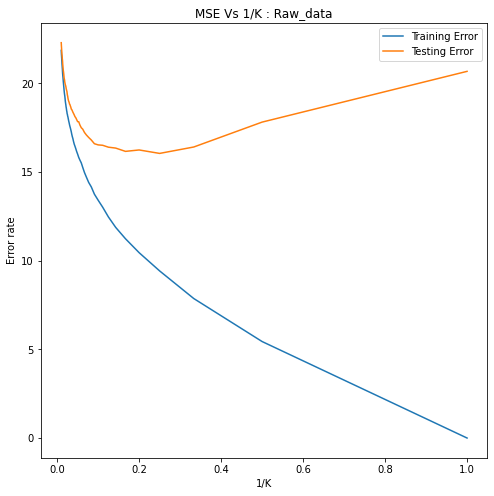

In [28]:
#KNN regression
# use raw data
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

k_inverse = list()
train_error_knn = list()
test_error_knn = list()
idx = 0

for k in range(1, 101):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(x_train, y_train)
    k_inverse.append(1 / k)
    # predict train set and calculate mse
    train_pred_knn = model_knn.predict(x_train)
    mse_train_knn = mean_squared_error(y_train, train_pred_knn)
    train_error_knn.append(mse_train_knn)
    test_pred_knn = model_knn.predict(x_test)
    mse_test_knn = mean_squared_error(y_test, test_pred_knn)
    test_error_knn.append(mse_test_knn)

    if mse_train_knn < test_error_knn[idx]:
        idx = k - 1;

mse_models["kNN_rawData"] = [train_error_knn[idx], test_error_knn[idx]]
fig1, axs1 = plt.subplots(figsize=(8, 8))
axs1.plot(k_inverse, train_error_knn, label="Training Error")
axs1.plot(k_inverse, test_error_knn, label="Testing Error")
axs1.set_xlabel("1/K")
axs1.set_ylabel("Error rate")
axs1.legend()
axs1.set_title("MSE Vs 1/K : Raw_data")
plt.show()

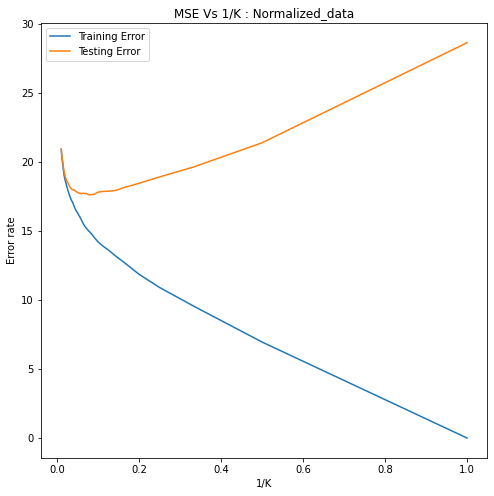

In [29]:
# using normalized data
x_train_normalized = normalize(x_train)
x_test_normalized = normalize(x_test)

k_inverse = list()
train_error_knn_norm = list()
test_error_knn_norm = list()
idx = 0

for k in range(1, 101):
    model_knn_norm = KNeighborsRegressor(n_neighbors=k)
    model_knn_norm.fit(x_train_normalized, y_train)
    k_inverse.append(1 / k)
    train_pred_knn_norm = model_knn_norm.predict(x_train_normalized)
    mse_train_knn_norm = mean_squared_error(y_train, train_pred_knn_norm)
    train_error_knn_norm.append(mse_train_knn_norm)
    test_pred_knn_norm = model_knn_norm.predict(x_test_normalized)
    mse_test_knn_norm = mean_squared_error(y_test, test_pred_knn_norm)
    test_error_knn_norm.append(mse_test_knn_norm)

    if mse_train_knn_norm < test_error_knn_norm[idx]:
        idx = k - 1;

mse_models["kNN_NormData"] = [train_error_knn_norm[idx], test_error_knn_norm[idx]]
fig1, axs1 = plt.subplots(figsize=(8, 8))
axs1.plot(k_inverse, train_error_knn_norm, label="Training Error")
axs1.plot(k_inverse, test_error_knn_norm, label="Testing Error")
axs1.set_xlabel("1/K")
axs1.set_ylabel("Error rate")
axs1.legend()
axs1.set_title("MSE Vs 1/K : Normalized_data")
plt.show()


Q4_J:

In [32]:
error=pd.DataFrame(data=mse_models)
error=error.rename(index={0:'Train_MSE',1:'Test_MSE'})
print(error)
print("Best error on offer is from the model fitted on Features+Interactions+Nonlinearity(x_square)")

           All Features_LinearRegression  \
Train_MSE                      20.518696   
Test_MSE                       21.357070   

           Features + Interactions + NonLinearity  \
Train_MSE                               17.871294   
Test_MSE                                18.677607   

           Removing insignificant terms  kNN_rawData  kNN_NormData  
Train_MSE                     17.926440    21.854764     20.474426  
Test_MSE                      18.659647    22.288404     20.527530  
Best error on offer is from the model fitted on Features+Interactions+Nonlinearity(x_square)
